In [ ]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Upload CSV to session storage
books_sample = pd.read_csv('books_data_50.csv')

In [ ]:
books_sample.style

,Unnamed: 0,Author,Text
0,0,a,"soul. Or, if you shall so prefer to choose, a new province of knowledge and new avenues to fame and power shall be laid open to you, here, in this room, upon the instant; and your sight shall be blasted by a prodigy to stagger the unbelief of Satan.” “Sir,”"
1,1,a,"the house a man who will present himself in my name, and to place in his hands the drawer that you will have brought with you from my cabinet. Then you will have played your part and earned my gratitude completely. Five minutes afterwards, if you insist upon an explanation,"
2,2,a,"themselves and of each other, and what does not always follow, men who thoroughly enjoyed each other’s company. After a little rambling talk, the lawyer led up to the subject which so disagreeably preoccupied his mind. “I suppose, Lanyon,” said he, “you and I must be the two oldest friends"
3,3,a,"so vast a majority of my fellows, that I chose the better part and was found wanting in the strength to keep to it. Yes, I preferred the elderly and discontented doctor, surrounded by friends and cherishing honest hopes; and bade a resolute farewell to the liberty, the comparative youth,"
4,4,a,"and at that Mr. Hyde broke out of all bounds and clubbed him to the earth. And next moment, with ape-like fury, he was trampling his victim under foot and hailing down a storm of blows, under which the bones were audibly shattered and the body jumped upon the roadway."
5,5,a,"a certain incoherency of manner. “I am painfully situated, Utterson; my position is a very strange—a very strange one. It is one of those affairs that cannot be mended by talking.” “Jekyll,” said Utterson, “you know me: I am a man to be trusted. Make a clean breast of this"
6,6,a,"of the three windows was half-way open; and sitting close beside it, taking the air with an infinite sadness of mien, like some disconsolate prisoner, Utterson saw Dr. Jekyll. “What! Jekyll!” he cried. “I trust you are better.” “I am very low, Utterson,” replied the doctor drearily, “very low. It"
7,7,a,"of premature twilight, although the sky, high up overhead, was still bright with sunset. The middle one of the three windows was half-way open; and sitting close beside it, taking the air with an infinite sadness of mien, like some disconsolate prisoner, Utterson saw Dr. Jekyll. “What! Jekyll!” he cried."
8,8,a,"taste, something eminently human beaconed from his eye; something indeed which never found its way into his talk, but which spoke not only in these silent symbols of the after-dinner face, but more often and loudly in the acts of his life. He was austere with himself; drank gin when"
9,9,a,"mere darkness and besieged by questions. Six o’clock struck on the bells of the church that was so conveniently near to Mr. Utterson’s dwelling, and still he was digging at the problem. Hitherto it had touched him on the intellectual side alone; but now his imagination also was engaged, or"


In [ ]:
lemmatiser = WordNetLemmatizer()
#Add a condition to check for digits
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopwords.words('english')]

In [ ]:
y = books_sample['Author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
X = books_sample['Text']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)

In [ ]:
text_bow_test

<200x5378 sparse matrix of type '<class 'numpy.int64'>'
	with 3824 stored elements in Compressed Sparse Row format>

In [ ]:
model = MultinomialNB()
model = model.fit(text_bow_train, y_train)
model.score(text_bow_train, y_train)

0.99625

In [ ]:
model.score(text_bow_test, y_test)

0.87

In [ ]:
predictions = model.predict(text_bow_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        39
           1       0.87      0.77      0.82        44
           2       0.80      0.95      0.87        41
           3       0.83      0.86      0.85        35
           4       0.97      0.95      0.96        41

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True, random_state=123)
cv_scores = cross_val_score(model,text_bow_train,y_train,cv=kf)

In [ ]:
cv_scores

array([0.8375, 0.8875, 0.9125, 0.9   , 0.8375, 0.8   , 0.8375, 0.8125,
       0.8625, 0.825 ])

In [ ]:
cv_scores.mean()

0.85125

Normalized confusion matrix
[[0.82051282 0.05128205 0.02564103 0.1025641  0.        ]
 [0.04545455 0.77272727 0.11363636 0.04545455 0.02272727]
 [0.         0.04878049 0.95121951 0.         0.        ]
 [0.02857143 0.02857143 0.08571429 0.85714286 0.        ]
 [0.02439024 0.         0.02439024 0.         0.95121951]]


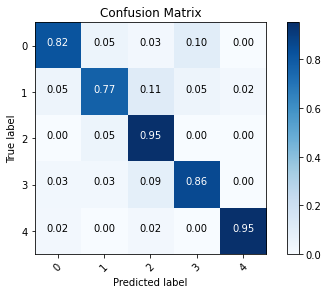

In [ ]:
# Importing necessary libraries
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt# Defining a module for Confusion Matrix...
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0])
                                  , range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test,predictions)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1,2,3,4], normalize=True,
                      title='Confusion Matrix')